### importer les packages necessaires

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### collecte de données

In [2]:
df = pd.read_csv('./data/iris.csv')
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [3]:
data = df
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Analyse exploratoire

## Analyse univariée

In [6]:
data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
data['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [8]:
data['Species'].value_counts(normalize=True)*100

setosa        33.333333
versicolor    33.333333
virginica     33.333333
Name: Species, dtype: float64

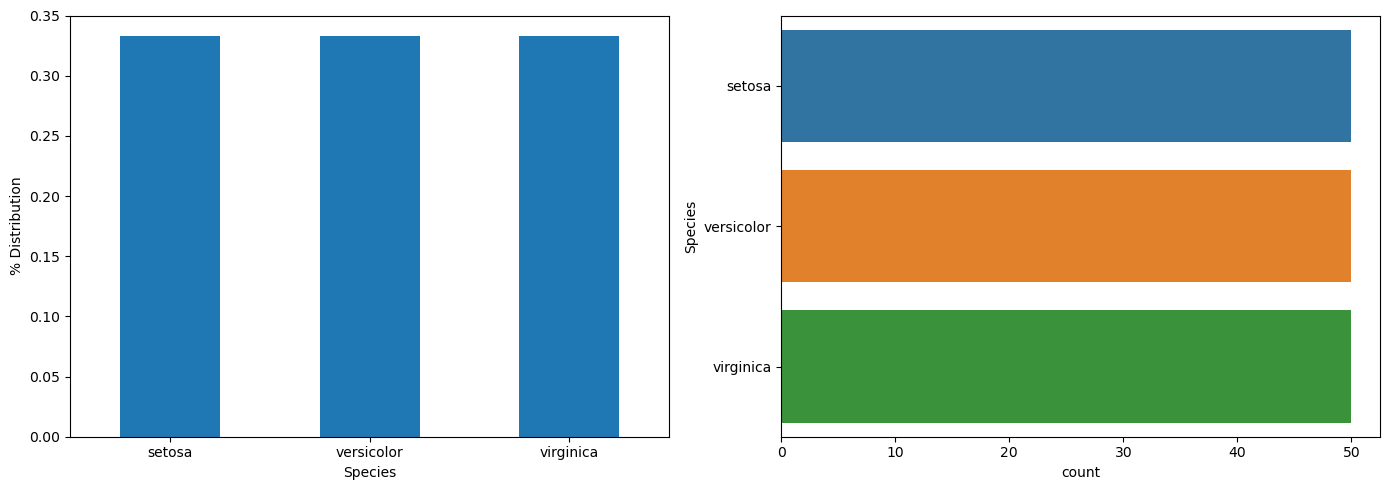

In [9]:
# distribution 

#sns.Plot(flights["month"], flights["passengers"]).add(sns.Bar())

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
data['Species'].value_counts(normalize=True).plot.bar(rot=0)
plt.xlabel('Species')
plt.ylabel('% Distribution')
plt.subplot(1,2,2)
sns.countplot(data=data,y='Species')
plt.tight_layout()
plt.show()

In [10]:
# Features ou caracteristiques 

feature = data.drop(columns='Species')
feature

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [11]:
feature.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], dtype='object')

C:\Users\MTN Academy\AppData\Local\Temp\ipykernel_47864\4173755895.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color="#4F33FF")
C:\Users\MTN Academy\AppData\Local\Temp\ipykernel_47864\4173755895.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color="#4F33FF")
C:\Users\MTN Academy\AppData\Local\Temp\ipykernel_47864\4173755895.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, color="#4F33FF")
C:\Users\MTN Academy\AppData\Local\Temp\ipykernel_47864\4173755895.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=T

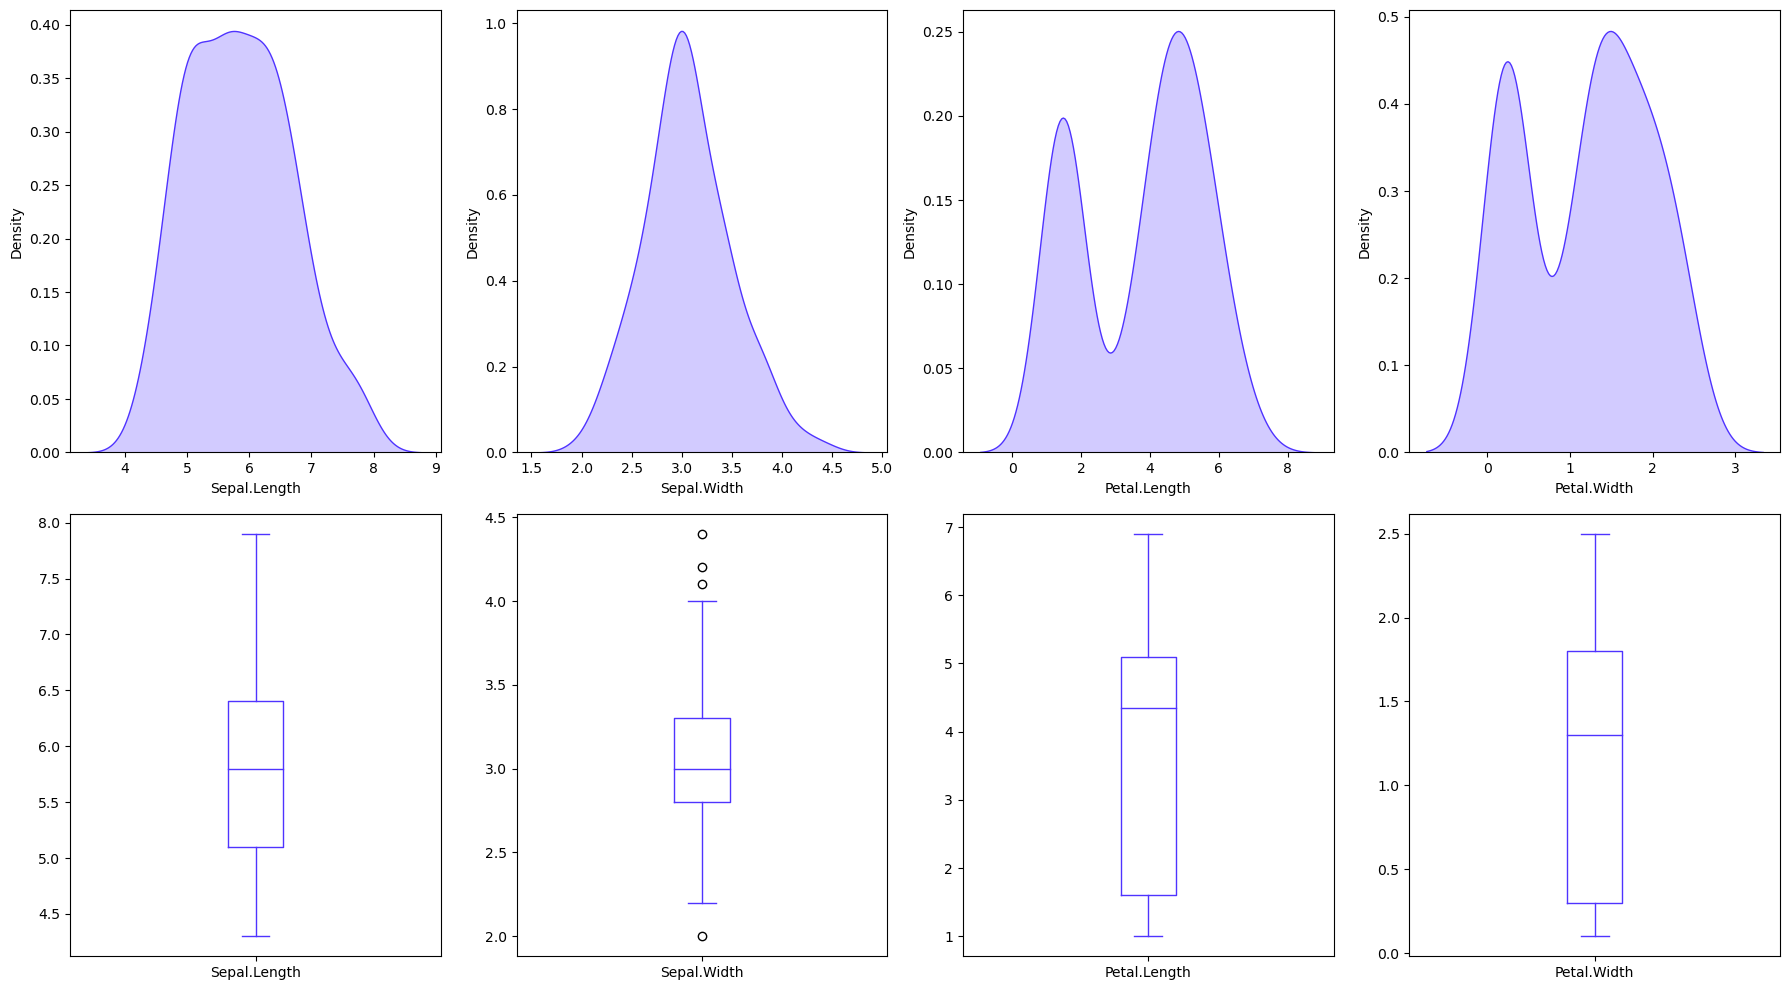

In [12]:
data_feature = feature.columns.tolist()
plt.figure(figsize=(18, 40))
colors = sns.color_palette("husl", len(data_feature))

for i, col in enumerate(data_feature, 1):
    plt.subplot(8, 4, i)
    sns.kdeplot(data[col], shade=True, color="#4F33FF")
    plt.subplot(8, 4, i+4)
    data[col].plot.box(color="#4F33FF")

plt.tight_layout()
plt.show()

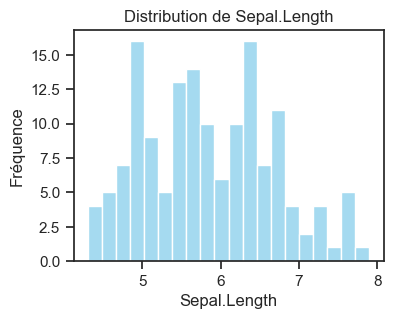

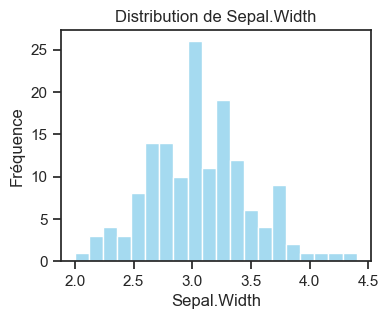

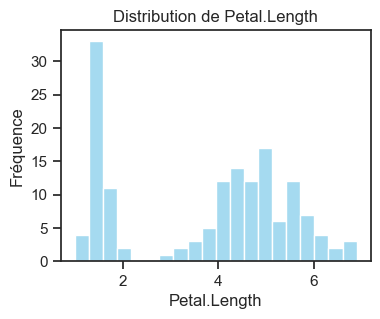

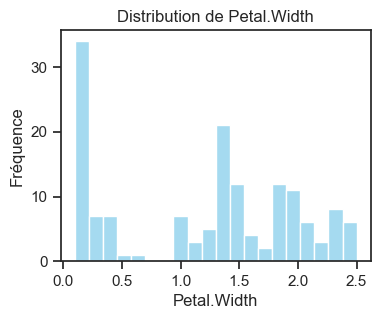

In [13]:
# Définir le style de Seaborn
sns.set(style="ticks")

# Parcours de chaque variable quantitative dans features
for var in feature.columns:
    if feature[var].dtype != 'object':  # Vérifier si la variable n'est pas de type 'object'
        plt.figure(figsize=(4,3))
        sns.histplot(feature[var], kde=False, color='skyblue', bins=20)  # Tracé de l'histogramme
        plt.title(f'Distribution de {var}')
        plt.xlabel(var)
        plt.ylabel('Fréquence')
        plt.show()

In [14]:
sk = data[data_feature].skew()
kr = data[data_feature].kurtosis()
print(sk)
print(kr)

Sepal.Length    0.314911
Sepal.Width     0.318966
Petal.Length   -0.274884
Petal.Width    -0.102967
dtype: float64
Sepal.Length   -0.552064
Sepal.Width     0.228249
Petal.Length   -1.402103
Petal.Width    -1.340604
dtype: float64


In [15]:
pd.DataFrame(data=[sk, kr], index=['skew', 'kurtosis'])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
skew,0.314911,0.318966,-0.274884,-0.102967
kurtosis,-0.552064,0.228249,-1.402103,-1.340604


## Analyse multivariée

In [16]:
# def clean_data(data):
#     data = data.drop_duplicates()
#     data = data.dropna()
#     for col in data.select_dtypes(include=["object"]):
#         data[col] = data[col].astype("category")
#         data[col] = data[col].cat.codes
#     return data
# data = clean_data(data)
# print(data)


C:\Users\MTN Academy\AppData\Local\Temp\ipykernel_47864\1855301200.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

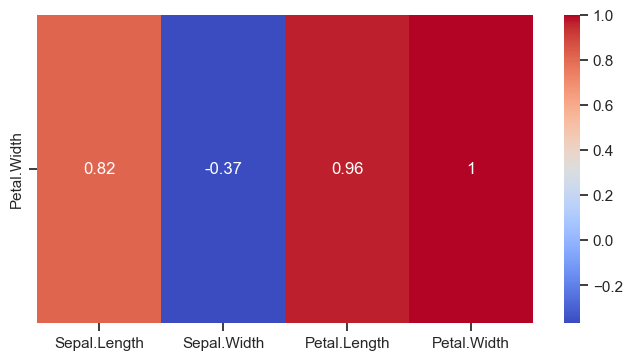

In [17]:
# Calcul de la matrice de corrélation
corr_matrix = data.corr()


plt.figure(figsize=(8, 4))
# Affichage de la matrice de corrélation sous forme de heatmap avec seaborn
sns.heatmap(corr_matrix.iloc[[-1]], annot=True, cmap="coolwarm")

### Machine learning

In [18]:
target = data['Species']

In [19]:
feature = data.drop('Species', axis=1)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
#Diviser le dataset pour le jeu d'apprentissage(training) et le test
X_train,X_test,y_train,y_test= train_test_split(feature, target, test_size= 0.2, random_state=40)

In [22]:
X_train.shape

(120, 4)

In [23]:
X_test.shape

(30, 4)

In [24]:
data.shape

(150, 5)

In [25]:
from sklearn.linear_model import LogisticRegression 

In [26]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9833333333333333

In [27]:
model.score(X_test, y_test)

1.0

In [28]:
model.predict_proba(X_test.iloc[:1])

array([[9.83992939e-01, 1.60070013e-02, 5.98617589e-08]])

In [33]:
prd = model.predict([[2, 5, 4, 9]])
print(prd)

['virginica']


c:\Users\MTN Academy\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [29]:
X_test.iloc[:1]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
39,4.4,3.0,1.3,0.2


In [30]:
y_test.iloc[:1]

39    setosa
Name: Species, dtype: object

In [31]:
data['Species'].unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [32]:
# Enregistrer le modèle pour le deploiement
pickle.dump(model, open("model.pkl", "wb"))